In [2]:
import pandas as pd
data = pd.read_csv('AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

#print(train.info())
target = 'SalePrice'

Simple Linear Regression

We'll start by understanding the univariate case of linear regression, also known as simple linear regression. The following equation is the general form of the simple linear regression model.

represents the target column while represents the feature column we choose to use in our model. These values are independent of the dataset. On the other hand, and

represent the parameter values that are specific to the dataset. The goal of simple linear regression is to find the optimal parameter values that best describe the relationship between the feature column and the target column. The following diagram shows different simple linear regression models depending on the data:

Simple Linear Regression

The first step is to select the feature,
, we want to use in our model. Once we select this feature, we can use scikit-learn to determine the optimal parameter values and based on the training data. Because one of the assumptions of linear regression is that the relationship between the feature(s) and the target column is linear, we want to pick a feature that seems like it has the strongest correlation with the final sale price.

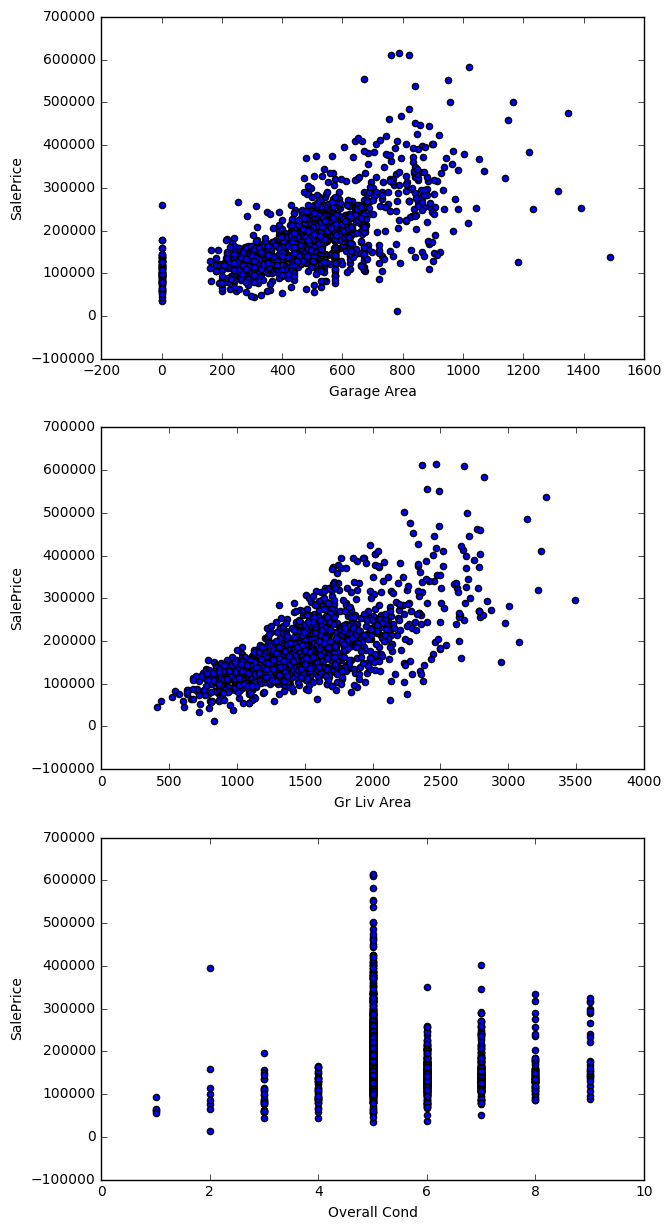

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond", y="SalePrice", ax=ax3, kind="scatter")

plt.show()

From the last screen, we can tell that the GrLivArea feature correlates the most with the SalePrice column. We can confirm this by calculating the correlation between pairs of these columns using the pandas.DataFrame.corr() method:

In [7]:
train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr()

,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.465366,-0.132401,0.662397
Gr Liv Area,0.465366,1.000000,-0.133710,0.698990
Overall Cond,-0.132401,-0.133710,1.000000,-0.099395
SalePrice,0.662397,0.698990,-0.099395,1.000000


Using Scikit-Learn To Train And Predict

Let's now use scikit-learn to find the optimal parameter values for our model. The scikit-learn library was designed to easily swap and try different models. Because we're familiar with the scikit-learn workflow for k-nearest neighbors, switching to using linear regression is straightforward.

Instead of working with the sklearn.neighbors.KNeighborsRegressors class, we work with the sklearn.linear_model.LinearRegression class. The LinearRegression class also has it's own fit() method. Specific to this model, however, is the coef_ and intercept_ attributes, which return
( to if it were a multivariate regression model) and accordingly.

In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train[['Gr Liv Area']],train['SalePrice'])
a1=lr.coef_
a0=lr.intercept_
print('coef is',a1)
print('intercept is',a0)

('coef is', array([ 116.86624683]))
('intercept is', 5366.8217100560141)


Making Predictions

In the last step, we fit a univariate linear regression model between the GrLivArea and SalePrice column. We then displayed the single coefficient and the residuel value. If we refer back to the format of our linear regression model, the fitted model can be represented as:

y_hat= 116.86624683*x1 + 5366.8217100560141

One way to interpret this model is "for every 1 square foot increase in above ground living area, we can expect the home's value to increase by approximately 116.87 dollars".

We can now use the predict() method to predict the labels using the training data and compare them with the actual labels. To quantify the fit, we can use mean squared error. Let's also perform simple validation by making predictions on the test set and calculate the MSE value for those predictions as well.

In [11]:
import numpy as np

lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
predictions_test=lr.predict(test[['Gr Liv Area']])
from sklearn.metrics import mean_squared_error
test_mse=mean_squared_error(test['SalePrice'],predictions_test)
test_rmse=np.sqrt(test_mse)
print('test_rmse is',test_rmse)
predictions_train=lr.predict(train[['Gr Liv Area']])
train_mse=mean_squared_error(train['SalePrice'],predictions_train)
train_rmse=np.sqrt(train_mse)
print('train_rmse is',train_rmse)

('test_rmse is', 57088.251612639091)
('train_rmse is', 56034.362001412803)


Multiple Linear Regression

Now that we've explored the basics of simple linear regression, we can extend what we've learned to the multivariate case (often called multiple linear regression). A multiple linear regression model allows us to capture the relationship between multiple feature columns and the target column. Here's what the formula looks like:

When using multiple features, the main challenge is selecting relevant features. In a later mission in this course, we'll dive into some approaches for feature selection. For now, let's train a model using the following columns from the dataset to see how train and test RMSE values are improved.

    Lot Area
    Gr Liv Area


In [12]:
cols = ['Overall Cond', 'Gr Liv Area']
lr = LinearRegression()
lr.fit(train[cols], train['SalePrice'])
predictions_test=lr.predict(test[cols])
from sklearn.metrics import mean_squared_error
test_mse=mean_squared_error(test['SalePrice'],predictions_test)
test_rmse_2=np.sqrt(test_mse)
predictions_train=lr.predict(train[cols])
train_mse=mean_squared_error(train['SalePrice'],predictions_train)
train_rmse_2=np.sqrt(train_mse)
print('test_rmse_2 is',test_rmse_2)
print('train_rmse_2 is',train_rmse_2)

('test_rmse_2 is', 57066.907794485589)
('train_rmse_2 is', 56032.398015258666)
